In [8]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [27]:
df=pd.read_csv('train.csv')

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

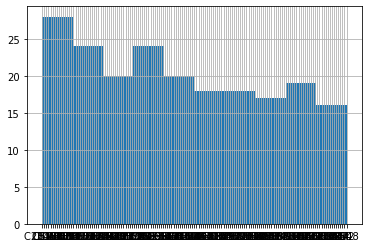

In [30]:
df['Cabin'].hist()

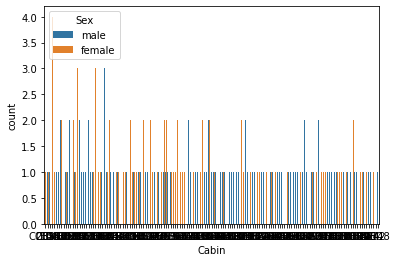

In [31]:
sns.countplot(x='Cabin', hue='Sex', data=df)

In [32]:
df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [33]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [34]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
embark=pd.get_dummies(df['Embarked'], drop_first=True)

In [35]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [36]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [37]:
df=pd.concat([df, sex, embark], axis=1)

In [38]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [39]:
def compute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 39
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    
df['Age']=df[['Age', 'Pclass']].apply(compute_age, axis=1)
    

In [40]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [41]:
print(x)
print(y)

     Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         3  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         3  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  1
4         3  35.0      0      0   8.0500     1  0  1
..      ...   ...    ...    ...      ...   ... .. ..
886       2  27.0      0      0  13.0000     1  0  1
887       1  19.0      0      0  30.0000     0  0  1
888       3  24.0      1      2  23.4500     0  0  1
889       1  26.0      0      0  30.0000     1  0  0
890       3  32.0      0      0   7.7500     1  1  0

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=1, test_size=0.3)

In [43]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [44]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()

rfr.fit(x_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
y_predict=rfr.predict(x_test)

In [49]:
y_predict

array([0.8 , 0.  , 0.9 , 0.6 , 1.  , 0.  , 0.  , 1.  , 0.3 , 0.5 , 0.  ,
       0.1 , 0.  , 0.  , 0.6 , 0.5 , 0.  , 0.  , 0.  , 0.7 , 0.  , 0.1 ,
       1.  , 0.  , 0.4 , 0.2 , 1.  , 0.7 , 0.  , 1.  , 0.4 , 0.7 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.  , 0.  , 0.4 , 0.  , 0.  , 0.7 , 0.9 , 0.9 ,
       1.  , 0.2 , 0.  , 0.33, 0.6 , 0.5 , 0.4 , 0.4 , 0.6 , 0.  , 0.4 ,
       0.7 , 0.2 , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.1 , 0.9 , 0.3 , 0.3 ,
       0.3 , 0.1 , 0.9 , 0.  , 0.  , 0.  , 0.1 , 0.  , 1.  , 0.  , 1.  ,
       0.  , 0.1 , 1.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.4 , 0.  , 0.  ,
       0.1 , 1.  , 0.9 , 0.  , 0.  , 0.6 , 0.  , 0.7 , 0.  , 0.4 , 0.  ,
       0.  , 0.5 , 0.1 , 0.4 , 0.5 , 1.  , 0.  , 0.5 , 0.5 , 0.  , 0.2 ,
       0.4 , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.6 , 0.7 , 0.1 , 1.  ,
       0.  , 0.  , 0.2 , 1.  , 0.9 , 1.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
       0.7 , 0.2 , 0.3 , 1.  , 1.  , 0.6 , 0.1 , 0.  , 1.  , 0.  , 1.  ,
       0.  , 0.  , 0.9 , 0.5 , 0.  , 0.2 , 0.  , 0.

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predict)

0.1923839552238806

In [51]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)


0.28294776119402987

In [47]:
rfr.score(x_test, y_test)

0.2146754646206307